In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2022-09-09 13:44:02--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  17.8MB/s    in 15s     

2022-09-09 13:44:18 (16.3 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-09-09 13:44:18--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s 

In [ ]:
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []

with open('coco.names','r') as f:
  classes = [line.strip() for line in f.readlines()]
layers = net.getLayerNames()
yolo_layers = [layers[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255,size = (len(classes),3))

In [ ]:
#load image
img = cv2.imread('dog1.jpg')
img = cv2.resize(img,None,fx =0.8,fy = 0.7)
height,width,channels = img.shape

In [ ]:
img.shape

(350, 374, 3)

In [ ]:
#detect objects
blob = cv2.dnn.blobFromImage(img , 0.00392,(416,416),(0,0,0),True,crop = False)

In [ ]:
#detecting objects
net.setInput(blob)
outs = net.forward(yolo_layers)


In [ ]:
#showing info on screen
class_ids = []
confidences = []
boxes = []

for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      #object detected
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      #rectangle coordinates
      x = int(center_x - w/2)
      y = int(center_x - w/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

[3]


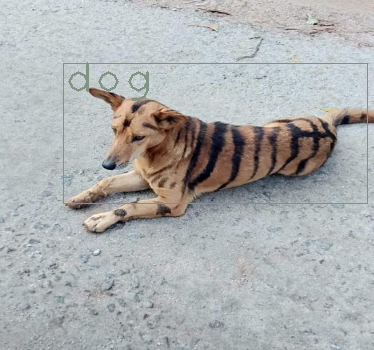

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
    cv2.putText(img,label,(x,y+30),font,3,color,2)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()